# Initialising libraries for plotting

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialising the data set, understanding the values in the data set

In [139]:
titanic_data = pd.read_csv('titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Investigating the dtypes of the data set. This is done to better understand how to manipulate the data.

In [140]:
#------Index------
#titanic_data.index
#------Column------
#titanic_data.columns
#------Info------
#titanic_data.info()
#------Describe------

titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Observation
The features Name, Sex, Ticket, Cabin and Embarked are all objects. They have to be converted into other primitive types later on to be used for modelling.
More analysis is done to better understand these objects.

In [141]:
titanic_data.describe(include=['O'])
#The include=['O'] tells the describe function to include summary statistics for categorial(object) variables in the DataFrame.
#Categorical variables are usually non-numeric data types, such as string or other discrete labels.
#From this, we can tell that 65% of the dataset are males.
#We can tell how many unique variables there are in each objects as well. This should be noted so that they can be manipultated later on.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Analysing the assumptions
My assumptions are:
1. women (Sex)
2. Children (Age)
3. Upper-Class passengers(PClass)
4. THe port (Embarked)

affect the survival rate. To determine if this is true, more investigaion has to be done. I do this by plotting the features to target, Survived.


In [142]:
#Data Analysis
#sns.countplot(x = 'Survived',data = titanic_data, hue = 'Sex')
titanic_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [143]:
titanic_data[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Observation

The analysis suggests that Assumption #1 and #3 hold true. Specifically, being female and belonging to a particular PClass appear to be associated with higher survival rates. If there were no correlation, we would expect the survival rates to be more similar across these groups.

# Visualing the data for numerical and ordinal features (Age and PClass)

Now the assumptions can be better visualized. A histogram chart is useful for analyzing continuous numerical variables such as age. It can indicate distribution of samples using automatically defined bins. This will to determine if specific age ranges survived better.

C:\Users\NicholasTeng\AppData\Local\Temp\ipykernel_15132\4102824134.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_percentage_by_age = titanic_data.groupby('AgeGroup')['Survived'].mean() * 100


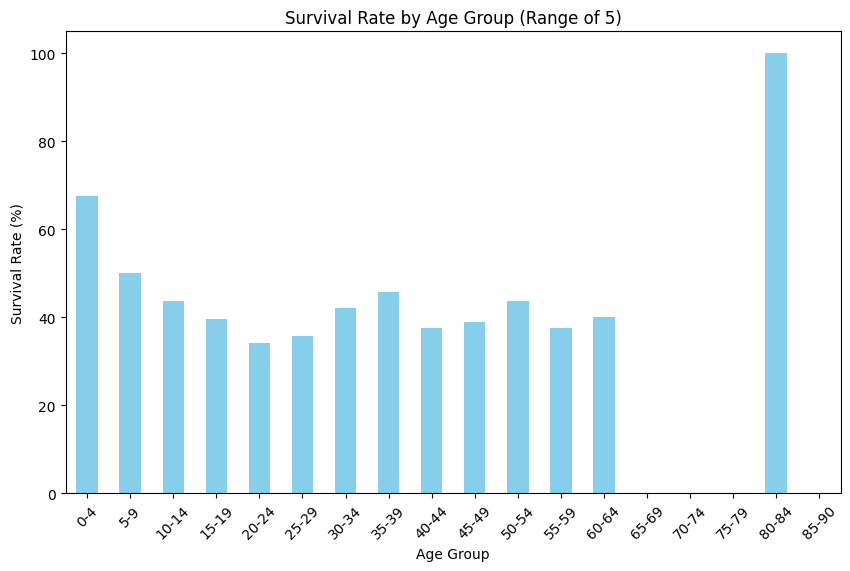

In [144]:

# Define age groups
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
          '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-90']

# Create a new column 'AgeGroup' in the DataFrame
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels, right=False)

# Calculate the survival rate for each age group
survival_percentage_by_age = titanic_data.groupby('AgeGroup')['Survived'].mean() * 100

# Create the plot
plt.figure(figsize=(10, 6))
survival_percentage_by_age.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Group (Range of 5)')
plt.xticks(rotation=45)
plt.show()

In [145]:
# Assuming 'titanic_data' is your DataFrame
above_80_count = len(titanic_data[titanic_data['Age'] > 79])
print(f'Number of people above 30 years old: {above_80_count}')

Number of people above 30 years old: 1


# Observation

It would seem that children under the age of 10 seem tohave the highest survival rate. This indicates that Age does indeed correlate with the survivalbility rate.

c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


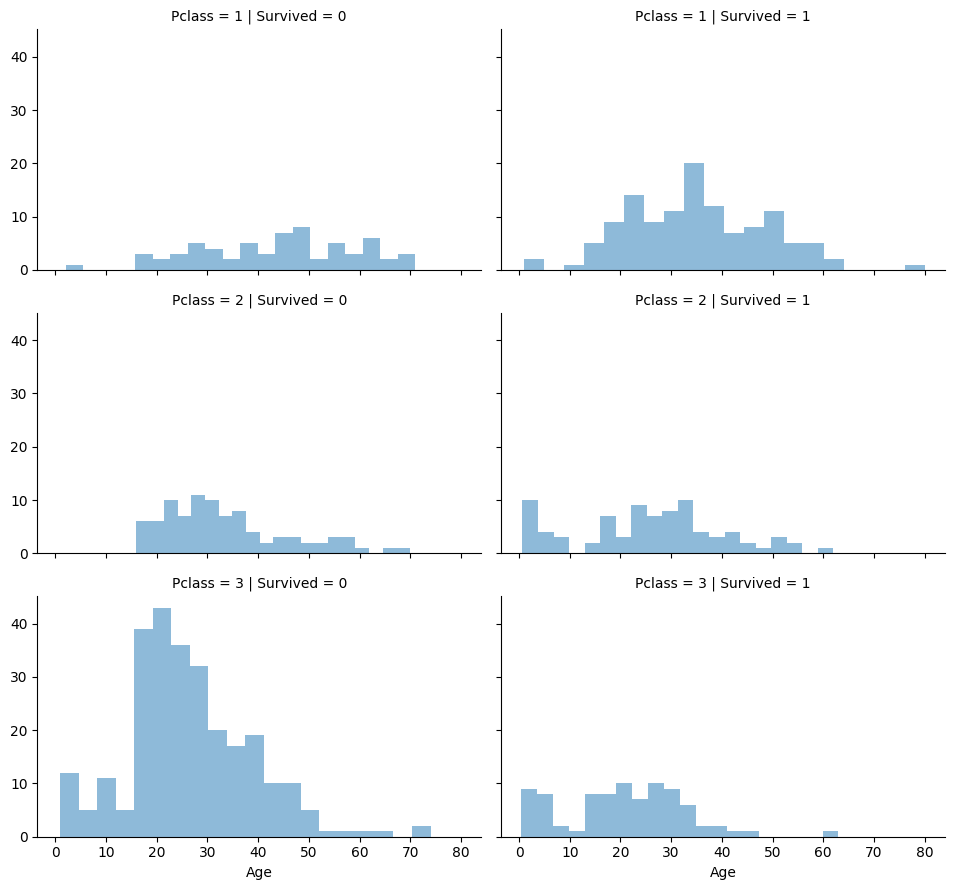

In [146]:
grid = sns.FacetGrid(titanic_data, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Observations

It would seem that infants in P2 mostly survived. Most passengers in P1 survived as well. However, those who belong to PClass 3 have a much lower survival rate throughout. The graphs indicate upper class and infants were more likely to survive. This aligns with the assumption that age and PClass does indeed affect the survival rate.

# Visualing the data for categorical features (Sex and Embarked)
In this section, cetegorical features such as Sex and Embarked will be plotted against the target variable, "Survived" to determine if it indeed has correlation between them.



c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


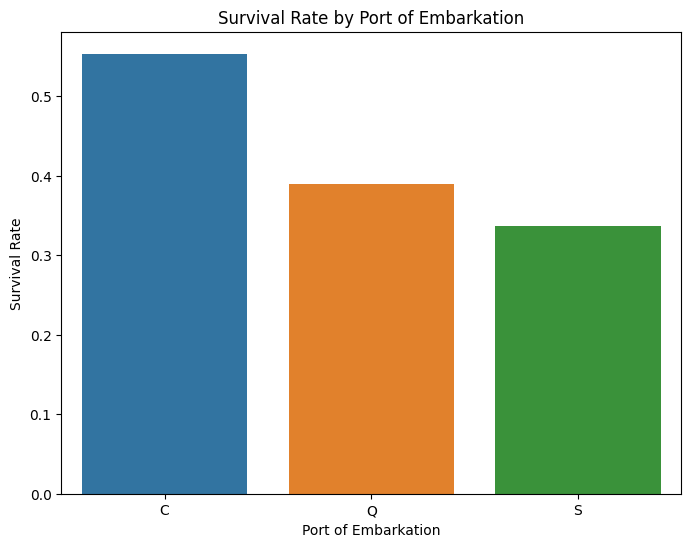

In [147]:
embarked_survival_rate = titanic_data.groupby('Embarked')['Survived'].mean().reset_index()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=embarked_survival_rate)

# Set labels and title
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Port of Embarkation')

# Show the plot
plt.show()

# Observation
Based on the bar graph, it appears that the ports where the passengers embark from do affect their survival rates.
It would seem that port C has the highest survivalbility rate. This disparity between each port supports the assumption that the ports do indeed affect the survival rate.


In [148]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64

<Axes: >

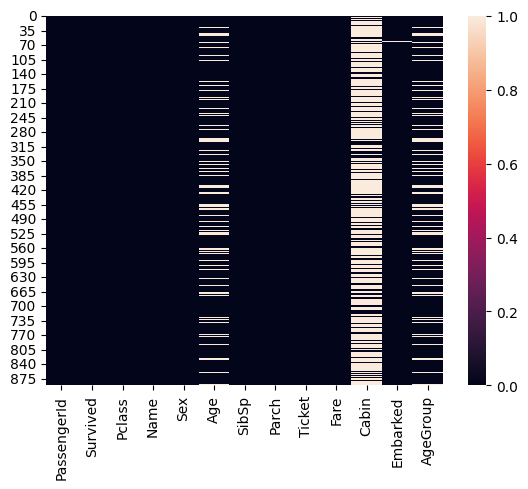

In [149]:
sns.heatmap(titanic_data.isna())

# Observation

Ther are missing values for Age. This must be rectified before using Age as a feature.

# Completing the Age feature (Continuous)

1 accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on... However, it does not make sense to me to use Pclass ad Gender features to guess the missing values of an individual's age. 

Thus, the missing Age values will be generated by randomly generating a value between the mean and the standard deviation.

In [150]:
# Step 1: Calculate mean and standard deviation of non-missing age values
mean_age = titanic_data['Age'].mean()
std_dev_age = titanic_data['Age'].std()

# Step 2: Generate random numbers
random_ages = np.random.normal(mean_age, std_dev_age, size=titanic_data['Age'].isnull().sum())

# Step 3: Replace missing age values with random numbers
titanic_data.loc[titanic_data['Age'].isnull(), 'Age'] = random_ages


<Axes: >

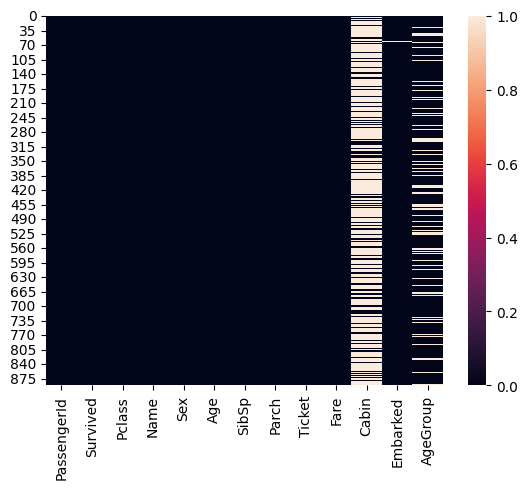

In [151]:
sns.heatmap(titanic_data.isna())
#Shows that all the missing age values have been filled.

# Observation

Now, all the Age values are filled.

# Modelling, Predicting and Solving

For this problem, a few models will be used, sepcifically Logistic regression, SVM and Random Forrest


In [152]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35-39


In [153]:
titanic_data['Sex'] = titanic_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')
titanic_data['Embarked']= titanic_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
titanic_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,20-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,35-39
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,25-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,35-39
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,35-39


In [154]:
from sklearn.model_selection import train_test_split
features = titanic_data.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','PassengerId','Survived', 'AgeGroup'],axis =1)
target = titanic_data['Survived']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

lr.fit(x_train,y_train)

predict = lr.predict(x_test)

pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,152,23
Actual Yes,34,86


In [156]:
from sklearn.metrics import classification_report


print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       175
           1       0.79      0.72      0.75       120

    accuracy                           0.81       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295



# Using SVM next

In [157]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
#acc_svc = round(svc.score(x_train, y_train) * 100, 2)
#acc_svc
print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74       175
           1       0.00      0.00      0.00       120

    accuracy                           0.59       295
   macro avg       0.30      0.50      0.37       295
weighted avg       0.35      0.59      0.44       295



c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [158]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
#acc_knn = round(knn.score(x_train, y_train) * 100, 2)
#acc_knn
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       175
           1       0.74      0.61      0.67       120

    accuracy                           0.75       295
   macro avg       0.75      0.73      0.73       295
weighted avg       0.75      0.75      0.75       295



In [159]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
#acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
#acc_random_forest
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       175
           1       0.70      0.68      0.69       120

    accuracy                           0.75       295
   macro avg       0.74      0.74      0.74       295
weighted avg       0.75      0.75      0.75       295



# Conclusion

It appears that using logistic regression has provided the highest precision out of all the other models. 